In [1]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
from keras.models import Model
from keras.optimizers import RMSprop
from tensorflow.python import keras
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from keras.layers.normalization import BatchNormalization
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from keras import backend as K
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import pandas as pd

Using TensorFlow backend.


In [0]:
# Getting data

train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

print
# get data and labels
train_data= np.array(train.iloc[:,1:])
test_data= np.array(test.iloc[:,1:])
train_labels= np.array(train.iloc[:,0]) 




In [5]:
# preprocess the data
train_data = train_data.reshape(-1, 28,28, 1)
test_data = test_data.reshape(-1, 28,28, 1)
print(train_data.dtype)
print(train_data.shape)

train_data = train_data / np.max(train_data)
test_data = test_data / np.max(test_data)
print(np.max(train_data))

# split train and validation
train_X,valid_X,train_ground,valid_ground = train_test_split(train_data,
                                                             train_data,
                                                             test_size=0.2,
                                                             random_state=13)

int64
(60000, 28, 28, 1)
1.0


In [0]:
# the encode part of the CNN
def encoder(input_img):
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) 
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) 
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) 
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) 
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) 
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3) 
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    return conv4

# The decode part of the cnn
def decoder(conv4):    
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4)
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv5)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv5) 
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv6)
    up1 = UpSampling2D((2,2))(conv6) 
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1) 
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv7)
    up2 = UpSampling2D((2,2))(conv7) 
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) 
    return decoded
 

input_img = Input(shape = (28, 28, 1))

# combine and compile the model
autoencoder = Model(input_img, decoder(encoder(input_img)))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())



In [8]:
# train the model

autoencoder.fit(train_X, train_ground, batch_size=64,epochs=10,verbose=1,validation_data=(valid_X, valid_ground))


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 59s 1ms/step - loss: 0.0195 - val_loss: 0.0127
Epoch 2/10
48000/48000 [==============================] - 50s 1ms/step - loss: 0.0092 - val_loss: 0.0075
Epoch 3/10
48000/48000 [==============================] - 50s 1ms/step - loss: 0.0067 - val_loss: 0.0058
Epoch 4/10
48000/48000 [==============================] - 50s 1ms/step - loss: 0.0057 - val_loss: 0.0109
Epoch 5/10
48000/48000 [==============================] - 50s 1ms/step - loss: 0.0051 - val_loss: 0.0048
Epoch 6/10
48000/48000 [==============================] - 50s 1ms/step - loss: 0.0047 - val_loss: 0.0041
Epoch 7/10
48000/48000 [==============================] - 50s 1ms/step - loss: 0.0043 - val_loss: 0.0044
Epoch 8/10
48000/48000 [==============================] - 50s 1ms/step - loss: 0.0040 - val_loss: 0.0042
Epoch 9/10
48000/48000 [==============================] - 50s 1ms/step - loss: 0.0037 - val_loss: 0.0046
Epoch

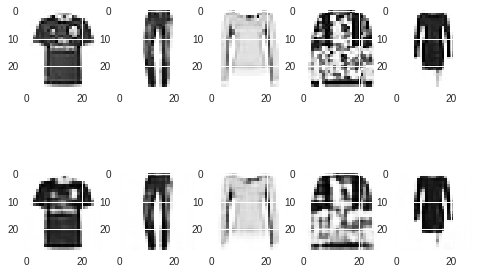

In [9]:
# plot the original pictures and reconstructed pictures

import matplotlib.pyplot as plt

n=5
for k in range(n):
    ax = plt.subplot(2, n, k+1)
    plt.imshow(test_data[k:k+1,:].reshape((28,28)))
    ax = plt.subplot(2, n, k+1 + n)
    reconstruction = autoencoder.predict(test_data[k:k+1,:])
    reconstruction.resize((28,28))
    plt.imshow(reconstruction)

In [0]:
# Question 2


#Model
# For this cnn
# I used two convolunational layers both with 2x2 kernel size since the dimension of the image is not that large
# each convolutional layer is followed by a max pooling layer that reduces the size by 2
# I chose same padding so that the input is padded to a multiple of 2
# the activation function I chose is relu for both convlutional layers

# that I flatten the input
# followed by a regular fully connected hidden layer with 256 neurons and a activation function of relu
# then a dropout layer to possibly reduce overfitting
# then finally a final fully connected output layer with softmax probabilities functions
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(2,2), padding = 'same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=(2, 2), padding='same', 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(output_dim = 10, activation = 'softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               401664    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if sys.path[0] == '':


In [0]:
# Split training and validations
# get dummies for labels

X_train, X_val, y_train, y_val = train_test_split(train_data,
                                                  train_labels,
                                                  test_size=0.2,
                                                  random_state=13)

y_train = pd.get_dummies(y_train)
y_val = pd.get_dummies(y_val)

In [0]:
model.fit(X_train, y_train,
          batch_size=128,
          epochs=20,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 5s 114us/step - loss: 0.0824 - acc: 0.9688 - val_loss: 0.2737 - val_acc: 0.9218
Epoch 2/20
48000/48000 [==============================] - 5s 114us/step - loss: 0.0731 - acc: 0.9728 - val_loss: 0.2742 - val_acc: 0.9219
Epoch 3/20
48000/48000 [==============================] - 5s 114us/step - loss: 0.0653 - acc: 0.9757 - val_loss: 0.2987 - val_acc: 0.9170
Epoch 4/20
48000/48000 [==============================] - 5s 114us/step - loss: 0.0616 - acc: 0.9767 - val_loss: 0.3094 - val_acc: 0.9184
Epoch 5/20
48000/48000 [==============================] - 5s 114us/step - loss: 0.0589 - acc: 0.9784 - val_loss: 0.3090 - val_acc: 0.9218
Epoch 6/20
48000/48000 [==============================] - 5s 114us/step - loss: 0.0523 - acc: 0.9805 - val_loss: 0.3278 - val_acc: 0.9210
Epoch 7/20
48000/48000 [==============================] - 5s 114us/step - loss: 0.0520 - acc: 0.9806 - val_loss: 0.3186 - 

In [0]:
# Question 2.2
from keras.applications import VGG16;
from keras.applications.vgg16 import preprocess_input

In [0]:
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

# get data and labels
train_X= np.array(train_data.iloc[:,1:])
test_X= np.array(test_data.iloc[:,1:])
train_Y= np.array (train_data.iloc[:,0]) 

In [0]:
train_X=np.dstack([train_X] * 3)
test_X=np.dstack([test_X]*3)

train_X = train_X.reshape(-1, 28,28,3)
test_X= test_X.reshape (-1,28,28,3)

from keras.preprocessing.image import img_to_array, array_to_img

train_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in train_X])
test_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in test_X])

train_X.shape, test_X.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [0]:
train_X = train_X / 255.
test_X = test_X / 255.
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

In [0]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [0]:
train_X,valid_X,train_label,valid_label = train_test_split(train_X,
                                                           train_Y_one_hot,
                                                           test_size=0.2,
                                                           random_state=13
                                                           )

In [0]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape


((48000, 48, 48, 3), (12000, 48, 48, 3), (48000, 10), (12000, 10))

In [0]:
from keras.applications.vgg16 import preprocess_input


IMG_WIDTH = 48
IMG_HEIGHT = 48
IMG_DEPTH = 3
BATCH_SIZE = 16

train_X = preprocess_input(train_X)
valid_X = preprocess_input(valid_X)
test_X  = preprocess_input (test_X)

In [0]:
# base model 
conv_base = VGG16(weights='imagenet',
                  include_top=False, 
                  input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH)
                 )

In [0]:
# Extracting features
train_features = conv_base.predict(np.array(train_X), batch_size=BATCH_SIZE, verbose=1)
test_features = conv_base.predict(np.array(test_X), batch_size=BATCH_SIZE, verbose=1)
val_features = conv_base.predict(np.array(valid_X), batch_size=BATCH_SIZE, verbose=1)

12000/12000 [==============================] - 13s 1ms/step


In [0]:
# Flatten extracted features
train_features_flat = np.reshape(train_features, (48000, 1*1*512))
test_features_flat = np.reshape(test_features, (10000, 1*1*512))
val_features_flat = np.reshape(val_features, (12000, 1*1*512))

In [0]:
from keras import models
from keras.models import Model
from keras import layers
from keras import optimizers

NB_TRAIN_SAMPLES = train_features_flat.shape[0]
NB_VALIDATION_SAMPLES = val_features_flat.shape[0]
NB_EPOCHS = 100

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=(1*1*512)))
model.add(layers.Dense(10, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(),
    metrics=['acc'])

In [0]:
model.fit(
    train_features_flat,
    train_label,
    epochs=20,
    validation_data=(val_features_flat, valid_label)
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 8s 177us/step - loss: 0.8215 - acc: 0.6982 - val_loss: 0.8181 - val_acc: 0.7002
Epoch 2/20
48000/48000 [==============================] - 9s 181us/step - loss: 0.8142 - acc: 0.7013 - val_loss: 0.8521 - val_acc: 0.6744
Epoch 3/20
48000/48000 [==============================] - 9s 181us/step - loss: 0.8101 - acc: 0.7024 - val_loss: 0.7953 - val_acc: 0.7095
Epoch 4/20
48000/48000 [==============================] - 9s 182us/step - loss: 0.7986 - acc: 0.7070 - val_loss: 0.7795 - val_acc: 0.7192
Epoch 5/20
48000/48000 [==============================] - 9s 181us/step - loss: 0.7939 - acc: 0.7083 - val_loss: 0.7815 - val_acc: 0.7140
Epoch 6/20
48000/48000 [==============================] - 9s 181us/step - loss: 0.7918 - acc: 0.7091 - val_loss: 0.8021 - val_acc: 0.7047
Epoch 7/20
48000/48000 [==============================] - 9s 181us/step - loss: 0.7832 - acc: 0.7115 - val_loss: 0.7962 - 

In [0]:
# Question 3.1

# getting the data
beg = pd.read_csv('benign-urls.txt')
mal = pd.read_csv('malicious-urls.txt', header = None)
mal['label'] = 1
beg['label'] = 0

mal.columns = ['text', 'label']
beg.columns = ['text', 'label']


url_data = pd.concat([mal, beg])


# proprocess the data
class_zero = url_data[url_data['label'] == 0].reset_index()
class_one = url_data[url_data['label'] == 1].reset_index()

class_zero = class_zero.truncate(before=1, after=class_one.shape[0])

url_data = pd.concat([class_zero, class_one])
url_data = url_data.sample(frac=1.0).reset_index()


# getting a character level model for the data
char2idx = dict()
max_url_seq_length = 0
for url in url_data['text']:
    max_url_seq_length = max(max_url_seq_length, len(url))
    for c in url:
      if c not in char2idx:
        char2idx[c] = len(char2idx)
num_input_tokens = len(char2idx)
idx2char = dict([(idx, c) for c, idx in char2idx.items()])

config = dict()
config['num_input_tokens'] = num_input_tokens
config['char2idx'] = char2idx
config['idx2char'] = idx2char
config['max_url_seq_length'] = max_url_seq_length

print(config)

text_model = config

{'num_input_tokens': 39, 'char2idx': {'.': 0, 'g': 1, 'o': 2, 'l': 3, 'e': 4, 'c': 5, 'm': 6, 'f': 7, 'a': 8, 'n': 9, 'u': 10, 's': 11, 'b': 12, 'y': 13, 'd': 14, 'i': 15, 't': 16, 'r': 17, 'h': 18, 'p': 19, 'v': 20, 'j': 21, '2': 22, '5': 23, 'w': 24, 'x': 25, 'k': 26, 'z': 27, '3': 28, '7': 29, '4': 30, '-': 31, '8': 32, '1': 33, 'q': 34, '0': 35, '6': 36, 'G': 37, '9': 38}, 'idx2char': {0: '.', 1: 'g', 2: 'o', 3: 'l', 4: 'e', 5: 'c', 6: 'm', 7: 'f', 8: 'a', 9: 'n', 10: 'u', 11: 's', 12: 'b', 13: 'y', 14: 'd', 15: 'i', 16: 't', 17: 'r', 18: 'h', 19: 'p', 20: 'v', 21: 'j', 22: '2', 23: '5', 24: 'w', 25: 'x', 26: 'k', 27: 'z', 28: '3', 29: '7', 30: '4', 31: '-', 32: '8', 33: '1', 34: 'q', 35: '0', 36: '6', 37: 'G', 38: '9'}, 'max_url_seq_length': 58}


In [0]:
# Function for extracting url data
def extract_training_data(url_data):
        data_size = url_data.shape[0]
        X = np.zeros(shape=(data_size, max_url_seq_length, num_input_tokens))
        Y = np.zeros(shape=(data_size, 2))
        for i in range(data_size):
            url = url_data['text'][i]
            label = url_data['label'][i]
            for idx, c in enumerate(url):
                X[i, idx, char2idx[c]] = 1
            Y[i, label] = 1

        return X, Y
      

In [0]:
# build a LSTM model
from keras.layers import LSTM, Dense, Dropout, Activation


batch_size = 64
epochs = 10
NB_LSTM_CELLS = 256
NB_DENSE_CELLS = 256

num_input_tokens = text_model['num_input_tokens']
char2idx = text_model['char2idx']
idx2char = text_model['idx2char']
max_url_seq_length = text_model['max_url_seq_length']

X, Y = extract_training_data(url_data)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=13)

model = Sequential()
model.add(LSTM(NB_LSTM_CELLS, input_shape=(None, num_input_tokens), return_sequences=False, return_state=False, dropout=0.2))
model.add(Dense(NB_DENSE_CELLS))
model.add(Dropout(0.3))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




In [0]:
model.fit(Xtrain, Ytrain, batch_size=batch_size, epochs=epochs, verbose=1,
                                 validation_data=(Xtest, Ytest))

Train on 2073 samples, validate on 519 samples
Epoch 1/10
2073/2073 [==============================] - 7s 3ms/step - loss: 0.6952 - acc: 0.5070 - val_loss: 0.6927 - val_acc: 0.5125
Epoch 2/10
2073/2073 [==============================] - 5s 2ms/step - loss: 0.6933 - acc: 0.4945 - val_loss: 0.6940 - val_acc: 0.4875
Epoch 3/10
2073/2073 [==============================] - 5s 2ms/step - loss: 0.6931 - acc: 0.5200 - val_loss: 0.6925 - val_acc: 0.5125
Epoch 4/10
2073/2073 [==============================] - 5s 2ms/step - loss: 0.6921 - acc: 0.5162 - val_loss: 0.6852 - val_acc: 0.5703
Epoch 5/10
2073/2073 [==============================] - 5s 2ms/step - loss: 0.4911 - acc: 0.7926 - val_loss: 0.2914 - val_acc: 0.8979
Epoch 6/10
2073/2073 [==============================] - 5s 2ms/step - loss: 0.3771 - acc: 0.8490 - val_loss: 0.3197 - val_acc: 0.9345
Epoch 7/10
2073/2073 [==============================] - 5s 2ms/step - loss: 0.3139 - acc: 0.8751 - val_loss: 0.3370 - val_acc: 0.9345
Epoch 8/10
2073

In [0]:

# Question 3.2
from keras.layers import Embedding, SpatialDropout1D, Conv1D, MaxPooling1D, LSTM, Dense


NB_LSTM_CELLS = 256
NB_DENSE_CELLS = 256
EMBEDDING_SIZE = 100

In [0]:
# function for extracting data from url dataframe
def extract_training_data(url_data):
        data_size = url_data.shape[0]
        X = np.zeros(shape=(data_size, max_url_seq_length))
        Y = np.zeros(shape=(data_size, 2))
        for i in range(data_size):
            url = url_data['text'][i]
            label = url_data['label'][i]
            for idx, c in enumerate(url):
                X[i, idx] = char2idx[c]
            Y[i, label] = 1

        return X, Y

In [0]:
# Get data
X, Y = extract_training_data(url_data)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=1994)

# Build model
model = Sequential()
model.add(Embedding(input_dim=num_input_tokens, input_length=max_url_seq_length, output_dim=EMBEDDING_SIZE))
model.add(SpatialDropout1D(0.2))
model.add(Conv1D(filters=256, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Dense(units=2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [0]:
model.fit(Xtrain, Ytrain, batch_size=64, epochs=10, verbose=1,
                                 validation_data=(Xtest, Ytest))

Train on 2073 samples, validate on 519 samples
Epoch 1/10
2073/2073 [==============================] - 4s 2ms/step - loss: 0.5061 - acc: 0.6922 - val_loss: 0.2552 - val_acc: 0.9017
Epoch 2/10
2073/2073 [==============================] - 2s 939us/step - loss: 0.1561 - acc: 0.9489 - val_loss: 0.0860 - val_acc: 0.9672
Epoch 3/10
2073/2073 [==============================] - 2s 938us/step - loss: 0.1178 - acc: 0.9614 - val_loss: 0.1065 - val_acc: 0.9788
Epoch 4/10
2073/2073 [==============================] - 2s 967us/step - loss: 0.0797 - acc: 0.9802 - val_loss: 0.0713 - val_acc: 0.9807
Epoch 5/10
2073/2073 [==============================] - 2s 973us/step - loss: 0.0485 - acc: 0.9870 - val_loss: 0.1290 - val_acc: 0.9557
Epoch 6/10
2073/2073 [==============================] - 2s 976us/step - loss: 0.0938 - acc: 0.9686 - val_loss: 0.0781 - val_acc: 0.9769
Epoch 7/10
2073/2073 [==============================] - 2s 969us/step - loss: 0.0461 - acc: 0.9879 - val_loss: 0.0592 - val_acc: 0.9807
Epo

In [0]:
# Questions 3.3

# from the validation accuracy on the data
# it seems like cnn produces a better result